Last updated: 16 Feb 2023

#   PyCaret Clustering on Mall Customers dataset from kaggle

dataset: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python?select=Mall_Customers.csv

PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows. It is an end-to-end machine learning and model management tool that exponentially speeds up the experiment cycle and makes you more productive.

Compared with the other open-source machine learning libraries, PyCaret is an alternate low-code library that can be used to replace hundreds of lines of code with a few lines only. This makes experiments exponentially fast and efficient. PyCaret is essentially a Python wrapper around several machine learning libraries and frameworks, such as scikit-learn, XGBoost, LightGBM, CatBoost, spaCy, Optuna, Hyperopt, Ray, and a few more.

The design and simplicity of PyCaret are inspired by the emerging role of citizen data scientists, a term first used by Gartner. Citizen Data Scientists are power users who can perform both simple and moderately sophisticated analytical tasks that would previously have required more technical expertise.


In [51]:
# check installed version
import pycaret
pycaret.__version__

'3.3.2'

# Quick start

PyCaret's Clustering Module is an unsupervised machine learning module that performs the task of grouping a set of objects in such a way that objects in the same group (also known as a cluster) are more similar to each other than to those in other groups. 

It provides several pre-processing features that prepare the data for modeling through the setup function. It has over 10 ready-to-use algorithms and several plots to analyze the performance of trained models. 

A typical workflow in PyCaret's unsupervised module consist of following 6 steps in this order:

### **Setup** ➡️ **Create Model** ➡️ **Assign Labels** ➡️ **Analyze Model** ➡️ **Prediction** ➡️ **Save Model**

In [7]:
# loading Mall Customers dataset from kaggle
import pandas as pd
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('./clustering/Mall_Customers.csv')
# encoding
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1       1   19                  15                      39
1           2       1   21                  15                      81
2           3       0   20                  16                       6
3           4       0   23                  16                      77
4           5       0   31                  17                      40


## Setup
This function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function in PyCaret. It only has one required parameter i.e. `data`. All the other parameters are optional.

In [8]:
# import pycaret clustering and init setup
from pycaret.clustering import *
s = setup(data, session_id = 123, use_gpu=True, verbose=False)

Once the setup has been successfully executed it shows the information grid containing experiment level information. 

- **Session id:**  A pseudo-random number distributed as a seed in all functions for later reproducibility. If no `session_id` is passed, a random number is automatically generated that is distributed to all functions.<br/>
<br/>
- **Original data shape:**  Shape of the original data prior to any transformations. <br/>
<br/>
- **Transformed data shape:**  Shape of data after transformations <br/>
<br/>
- **Numeric features :**  The number of features considered as numerical. <br/>
<br/>
- **Categorical features :**  The number of features considered as categorical. <br/>

PyCaret has two set of API's that you can work with. (1) Functional (as seen above) and (2) Object Oriented API.

With Object Oriented API instead of executing functions directly you will import a class and execute methods of class.

In [9]:
# import ClusteringExperiment and init the class
from pycaret.clustering import ClusteringExperiment
exp = ClusteringExperiment()

In [10]:
# check the type of exp
type(exp)

pycaret.clustering.oop.ClusteringExperiment

In [11]:
# init setup on exp
exp.setup(data, session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(200, 5)"
2,Transformed data shape,"(200, 5)"
3,Numeric features,5
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


You can use any of the two method i.e. Functional or OOP and even switch back and forth between two set of API's. The choice of method will not impact the results and has been tested for consistency.
___

## Create Model

This function trains and evaluates the performance of a given model. Metrics evaluated can be accessed using the `get_metrics` function. Custom metrics can be added or removed using the `add_metric` and `remove_metric` function. All the available models can be accessed using the `models` function.

In [12]:
# train kmeans model
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4209,260.8046,0.8565,0,0,0


In [13]:
# to check all the available models
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch


In [14]:
# train meanshift model
meanshift = create_model('meanshift')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0,0,0,0,0,0


## Assign Model
This function assigns cluster labels to the training data, given a trained model.

In [15]:
kmeans_cluster = assign_model(kmeans)
kmeans_cluster

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,Cluster 1
1,2,1,21,15,81,Cluster 1
2,3,0,20,16,6,Cluster 1
3,4,0,23,16,77,Cluster 1
4,5,0,31,17,40,Cluster 1
...,...,...,...,...,...,...
195,196,0,35,120,79,Cluster 2
196,197,0,45,126,28,Cluster 3
197,198,1,32,126,74,Cluster 2
198,199,1,32,137,18,Cluster 3


## Analyze Model

You can use the `plot_model` function to analyzes the performance of a trained model on the test set. It may require re-training the model in certain cases.

In [16]:
# plot pca cluster plot 
plot_model(kmeans, plot = 'cluster')

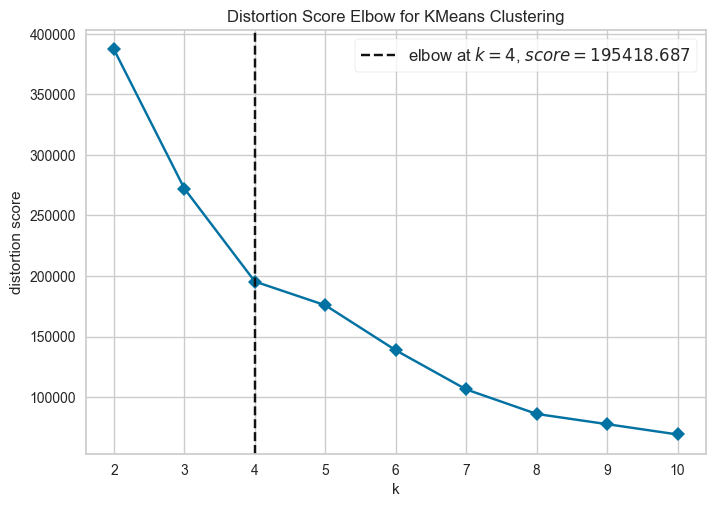

In [17]:
# plot elbow
plot_model(kmeans, plot = 'elbow')

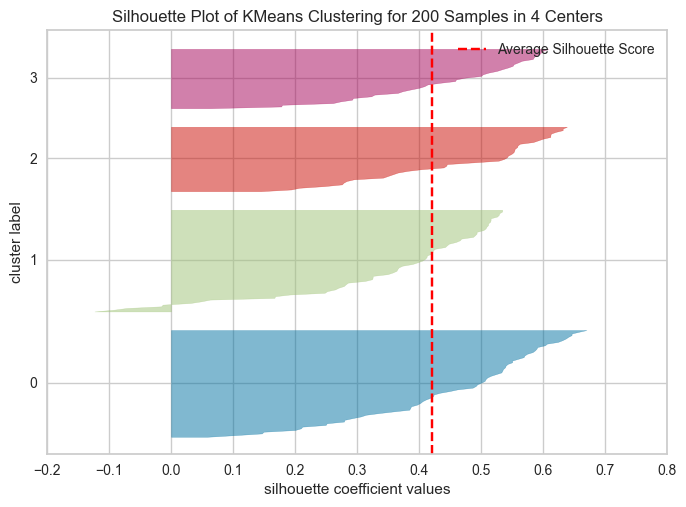

In [18]:
# plot silhouette
plot_model(kmeans, plot = 'silhouette')

In [19]:
# check docstring to see available plots 
# help(plot_model)

An alternate to `plot_model` function is `evaluate_model`. It can only be used in Notebook since it uses ipywidget.

In [20]:
evaluate_model(kmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Prediction
The `predict_model` function returns `Cluster` label as a new column in the input dataframe. This step may or may not be needed depending on the use-case. Some times clustering models are trained for analysis purpose only and the interest of user is only in assigned labels on the training dataset, that can be done using `assign_model` function. `predict_model` is only useful when you want to obtain cluster labels on unseen data (i.e. data that was not used during training the model).

In [21]:
# predict on test set
kmeans_pred = predict_model(kmeans, data=data)
kmeans_pred

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1.0,1.0,19.0,15.0,39.0,Cluster 1
1,2.0,1.0,21.0,15.0,81.0,Cluster 1
2,3.0,0.0,20.0,16.0,6.0,Cluster 1
3,4.0,0.0,23.0,16.0,77.0,Cluster 1
4,5.0,0.0,31.0,17.0,40.0,Cluster 1
...,...,...,...,...,...,...
195,196.0,0.0,35.0,120.0,79.0,Cluster 2
196,197.0,0.0,45.0,126.0,28.0,Cluster 3
197,198.0,1.0,32.0,126.0,74.0,Cluster 2
198,199.0,1.0,32.0,137.0,18.0,Cluster 3


## Save Model

Finally, you can save the entire pipeline on disk for later use, using pycaret's `save_model` function.

In [22]:
# save pipeline
save_model(kmeans, 'kmeans_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['CustomerID', 'Gender', 'Age',
                                              'Annual Income (k$)',
                                              'Spending Score (1-100)'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('trained_model', KMeans(n_clusters=4, random_state=123))]),
 'kmeans_pipeline.pkl')

In [23]:
# load pipeline
kmeans_pipeline = load_model('kmeans_pipeline')
kmeans_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\019101~1\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['CustomerID', 'Gender', 'Age',
                                             'Annual Income (k$)',
                                             'Spending Score (1-100)'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('trained_model', KMeans(n_clusters=4, random_state=123))])

# 👇 Detailed function-by-function overview

## ✅ Setup
This function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function in PyCaret. It only has one required parameter i.e. `data`. All the other parameters are optional.

In [24]:
# init setup
s = setup(data, session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(200, 5)"
2,Transformed data shape,"(200, 5)"
3,Numeric features,5
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


To access all the variables created by the setup function such as transformed dataset, random_state, etc. you can use `get_config` method.

In [25]:
# check all available config
get_config()

{'USI',
 'X',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables'}

In [26]:
# lets access X_train_transformed
get_config('X_train_transformed')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,1.0,19.0,15.0,39.0
1,2.0,1.0,21.0,15.0,81.0
2,3.0,0.0,20.0,16.0,6.0
3,4.0,0.0,23.0,16.0,77.0
4,5.0,0.0,31.0,17.0,40.0
...,...,...,...,...,...
195,196.0,0.0,35.0,120.0,79.0
196,197.0,0.0,45.0,126.0,28.0
197,198.0,1.0,32.0,126.0,74.0
198,199.0,1.0,32.0,137.0,18.0


In [27]:
# another example: let's access seed
print("The current seed is: {}".format(get_config('seed')))

# now lets change it using set_config
set_config('seed', 786)
print("The new seed is: {}".format(get_config('seed')))

The current seed is: 123
The new seed is: 786


All the preprocessing configurations and experiment settings/parameters are passed into the `setup` function. To see all available parameters, check the docstring:

In [28]:
# help(setup)

In [29]:
# init setup with normalize = True

s = setup(data, session_id = 123,
          normalize = True, normalize_method = 'minmax')

,Description,Value
0,Session id,123
1,Original data shape,"(200, 5)"
2,Transformed data shape,"(200, 5)"
3,Numeric features,5
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,minmax


<Axes: >

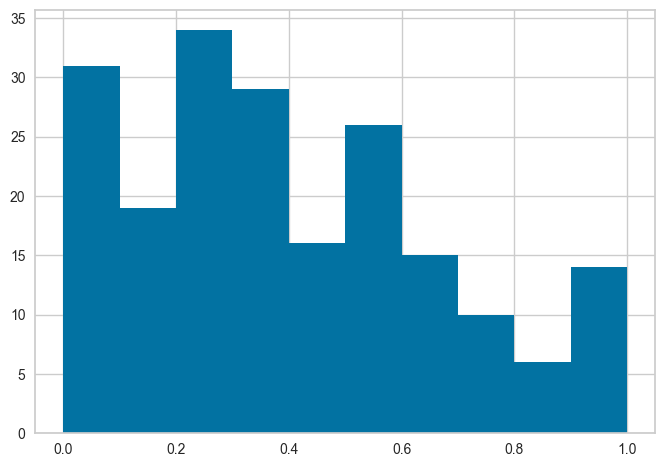

In [30]:
# lets check the X_train_transformed to see effect of params passed
get_config('X_train_transformed')['Age'].hist()

Notice that all the values are between 0 and 1 - that is because we passed `normalize=True` in the `setup` function. If you don't remember how it compares to actual data, no problem - we can also access non-transformed values using `get_config` and then compare. See below and notice the range of values on x-axis and compare it with histogram above.

<Axes: >

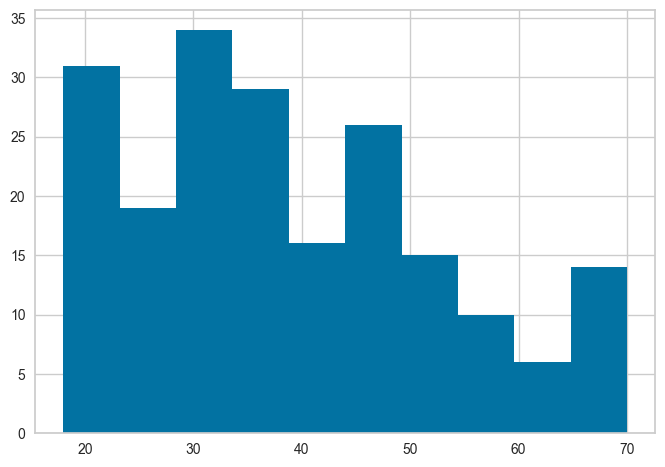

In [31]:
get_config('X_train')['Age'].hist()

## ✅ Experiment Logging
PyCaret integrates with many different type of experiment loggers (default = 'mlflow'). To turn on experiment tracking in PyCaret you can set `log_experiment` and `experiment_name` parameter. It will automatically track all the metrics, hyperparameters, and artifacts based on the defined logger.

In [32]:
# from pycaret.clustering import *
# s = setup(data, log_experiment='mlflow', experiment_name='jewellery_project')

In [33]:
# train kmeans
# kmeans = create_model('kmeans')

In [34]:
# start mlflow server on localhost:5000
# !mlflow ui

By default PyCaret uses `MLFlow` logger that can be changed using `log_experiment` parameter. Following loggers are available:
    
    - mlflow
    - wandb
    - comet_ml
    - dagshub
    
Other logging related parameters that you may find useful are:

- experiment_custom_tags
- log_plots
- log_data
- log_profile

For more information check out the docstring of the `setup` function.

In [35]:
# help(setup)

## ✅ Create Model
This function trains and evaluates the performance of a given estimator using cross-validation. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function. All the available models can be accessed using the models function.

In [36]:
# check all the available models
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch


In [37]:
# train kmeans
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2934,115.2931,1.2577,0,0,0


The function above has return trained model object as an output. The scoring grid is only displayed and not returned. If you need access to the scoring grid you can use `pull` function to access the dataframe.

In [38]:
kmeans_results = pull()
print(type(kmeans_results))
kmeans_results

<class 'pandas.core.frame.DataFrame'>


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2934,115.2931,1.2577,0,0,0


In [39]:
# train kmeans with 10 clusters
create_model('kmeans', num_clusters = 10)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4183,141.4099,0.8129,0,0,0


KMeans(n_clusters=10, random_state=123)

Some other parameters that you might find very useful in `create_model` are:

- num_clusters
- ground_truth
- fit_kwargs
- experiment_custom_tags
- engine

You can check the docstring of the function for more info.

In [40]:
# help(create_model)

## ✅ Assign Model
This function assigns cluster labels to the training data, given a trained model.

In [41]:
assign_model(kmeans)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,Cluster 1
1,2,1,21,15,81,Cluster 1
2,3,0,20,16,6,Cluster 2
3,4,0,23,16,77,Cluster 2
4,5,0,31,17,40,Cluster 2
...,...,...,...,...,...,...
195,196,0,35,120,79,Cluster 0
196,197,0,45,126,28,Cluster 0
197,198,1,32,126,74,Cluster 3
198,199,1,32,137,18,Cluster 3


## ✅ Plot Model
This function analyzes the performance of a trained model.

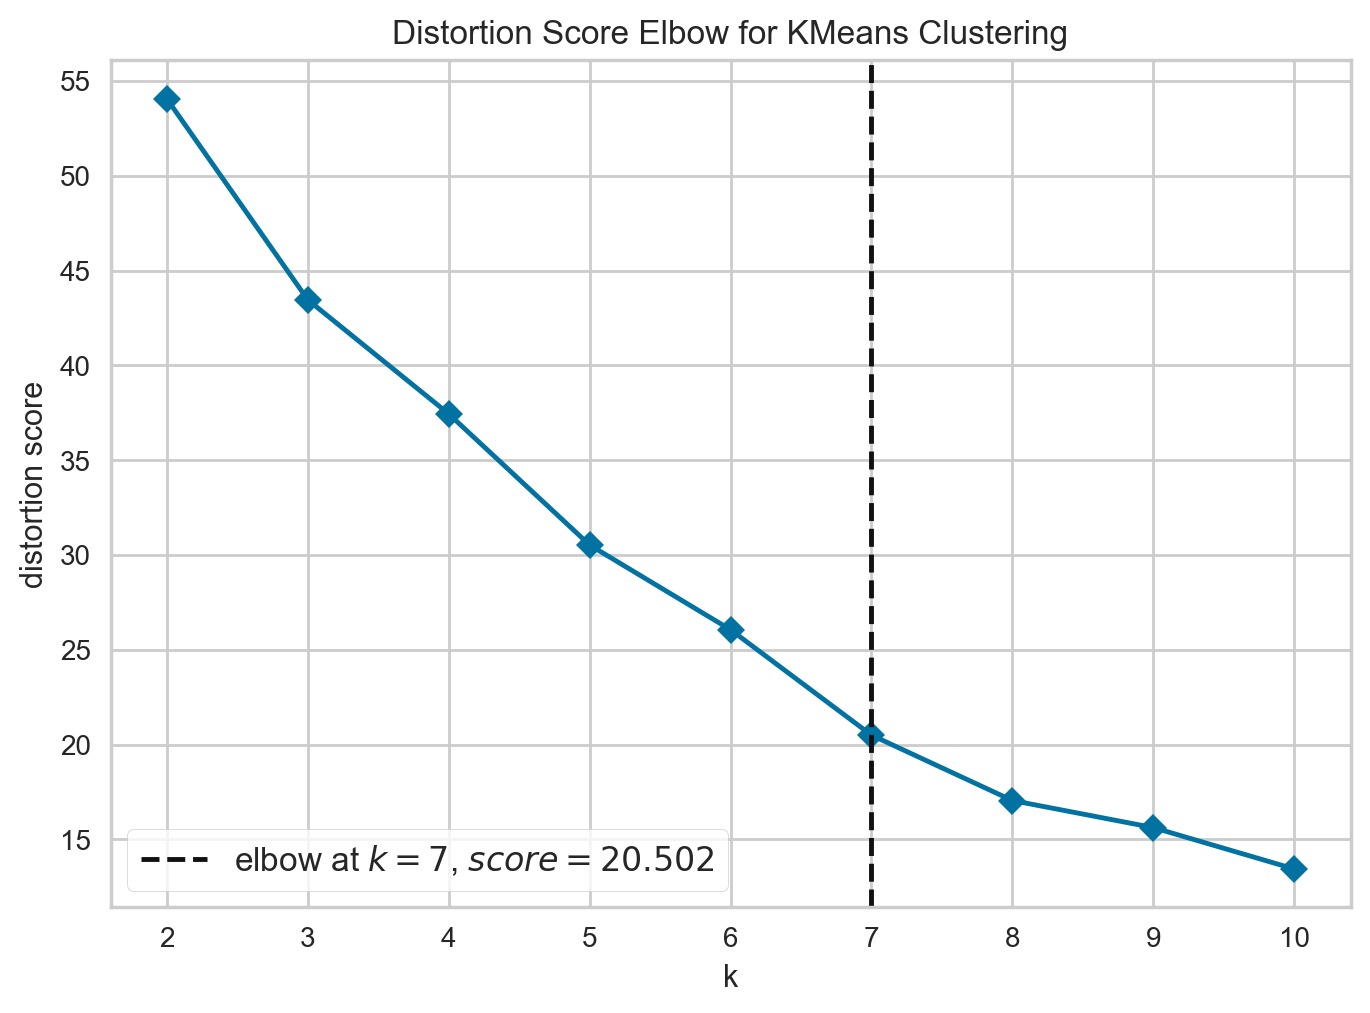

In [42]:
# to control the scale of plot
plot_model(kmeans, plot = 'elbow', scale = 2)

In [43]:
# to save the plot
plot_model(kmeans, plot = 'elbow', save=True)

'Elbow Plot.png'

Some other parameters that you might find very useful in `plot_model` are:

- feature
- label
- display_format

You can check the docstring of the function for more info.

In [44]:
# help(plot_model)

## ✅ Deploy Model
This function deploys the entire ML pipeline on the cloud.

**AWS:**  When deploying model on AWS S3, environment variables must be configured using the command-line interface. To configure AWS environment variables, type `aws configure` in terminal. The following information is required which can be generated using the Identity and Access Management (IAM) portal of your amazon console account:

- AWS Access Key ID
- AWS Secret Key Access
- Default Region Name (can be seen under Global settings on your AWS console)
- Default output format (must be left blank)

**GCP:** To deploy a model on Google Cloud Platform ('gcp'), the project must be created using the command-line or GCP console. Once the project is created, you must create a service account and download the service account key as a JSON file to set environment variables in your local environment. Learn more about it: https://cloud.google.com/docs/authentication/production

**Azure:** To deploy a model on Microsoft Azure ('azure'), environment variables for the connection string must be set in your local environment. Go to settings of storage account on Azure portal to access the connection string required.
AZURE_STORAGE_CONNECTION_STRING (required as environment variable)
Learn more about it: https://docs.microsoft.com/en-us/azure/storage/blobs/storage-quickstart-blobs-python?toc=%2Fpython%2Fazure%2FTOC.json

In [45]:
# deploy model on aws s3
# deploy_model(kmeans, model_name = 'my_first_platform_on_aws',
#             platform = 'aws', authentication = {'bucket' : 'pycaret-test'})

In [46]:
# load model from aws s3
# loaded_from_aws = load_model(model_name = 'my_first_platform_on_aws', platform = 'aws',
#                              authentication = {'bucket' : 'pycaret-test'})

# loaded_from_aws

## ✅ Save / Load Model
This function saves the transformation pipeline and a trained model object into the current working directory as a pickle file for later use.

In [47]:
# save model
save_model(kmeans, 'my_first_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['CustomerID', 'Gender', 'Age',
                                              'Annual Income (k$)',
                                              'Spending Score (1-100)'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                 ('trained_model', KMeans(n_clusters=4, random_state=123))]),
 'my_first_model.pkl')

In [48]:
# load model
loaded_from_disk = load_model('my_first_model')
loaded_from_disk

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\019101~1\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['CustomerID', 'Gender', 'Age',
                                             'Annual Income (k$)',
                                             'Spending Score (1-100)'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                ('trained_model', KMeans(n_clusters=4, random_state=123))])

## ✅ Save / Load Experiment
This function saves all the experiment variables on disk, allowing to later resume without rerunning the setup function.

In [49]:
# save experiment
save_experiment('my_experiment')

In [50]:
# load experiment from disk
exp_from_disk = load_experiment('my_experiment', data=data)

,Description,Value
0,Session id,123
1,Original data shape,"(200, 5)"
2,Transformed data shape,"(200, 5)"
3,Numeric features,5
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,minmax
